#  1. Data Collection/ Preparation 


**1.1 Import Data and Required Packages**

In [1]:
# Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv("students_adaptability_level_online_education.csv")

df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


**Shape of the Dataset**

In [3]:
df.shape

(1205, 14)

# 2. Data Processing 

In [4]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

There are no missing values in the dataset.

**Check Data Types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


**Checking the Number of unique values of each column**

In [6]:
df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

**Check Statistics of data set**

In [7]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [8]:
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [9]:
# Iterate over each column in the DataFrame

for i in df.columns:
    print(i, ":", df[i].unique().tolist())

Gender : ['Boy', 'Girl']
Age : ['21-25', '16-20', '11-15', '26-30', '6-10', '1-5']
Education Level : ['University', 'College', 'School']
Institution Type : ['Non Government', 'Government']
IT Student : ['No', 'Yes']
Location : ['Yes', 'No']
Load-shedding : ['Low', 'High']
Financial Condition : ['Mid', 'Poor', 'Rich']
Internet Type : ['Wifi', 'Mobile Data']
Network Type : ['4G', '3G', '2G']
Class Duration : ['3-6', '1-3', '0']
Self Lms : ['No', 'Yes']
Device : ['Tab', 'Mobile', 'Computer']
Adaptivity Level : ['Moderate', 'Low', 'High']


In [10]:
# numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 0 numerical features : []

We have 14 categorical features : ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding', 'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device', 'Adaptivity Level']


**Which device is more reliable in using online education?**

<Axes: ylabel='count'>

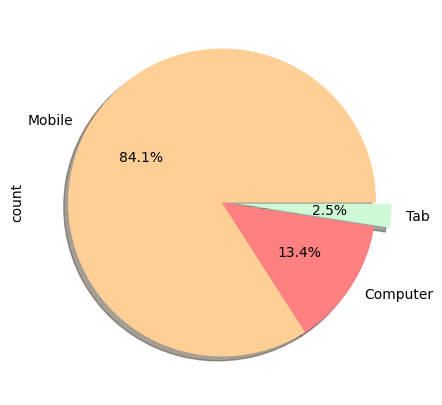

In [11]:
plt.figure(figsize = (8,5))
colors = ('#FFCF96','#FF8080','#CDFAD5')
explode = [0,0,0.1]
df['Device'].value_counts().plot.pie(colors = colors, explode = explode,autopct = '%1.1f%%', shadow = True)

**Device with more adaptability to take online education according to gender?**

In [12]:
# Assuming df is your DataFrame
fig = px.sunburst(
    df,
    path=['Adaptivity Level', 'Device', 'Gender'],
    color_discrete_map={'Mid': 'blue', 'Other': 'red'},  # Modify as needed
)

# Set the title
fig.update_layout(title='Sunburst Chart for Adaptivity Level',title_x=0.5)

# Display the chart
fig.show()
  

**Which age group is more likely to take online education?**

<Figure size 640x480 with 0 Axes>

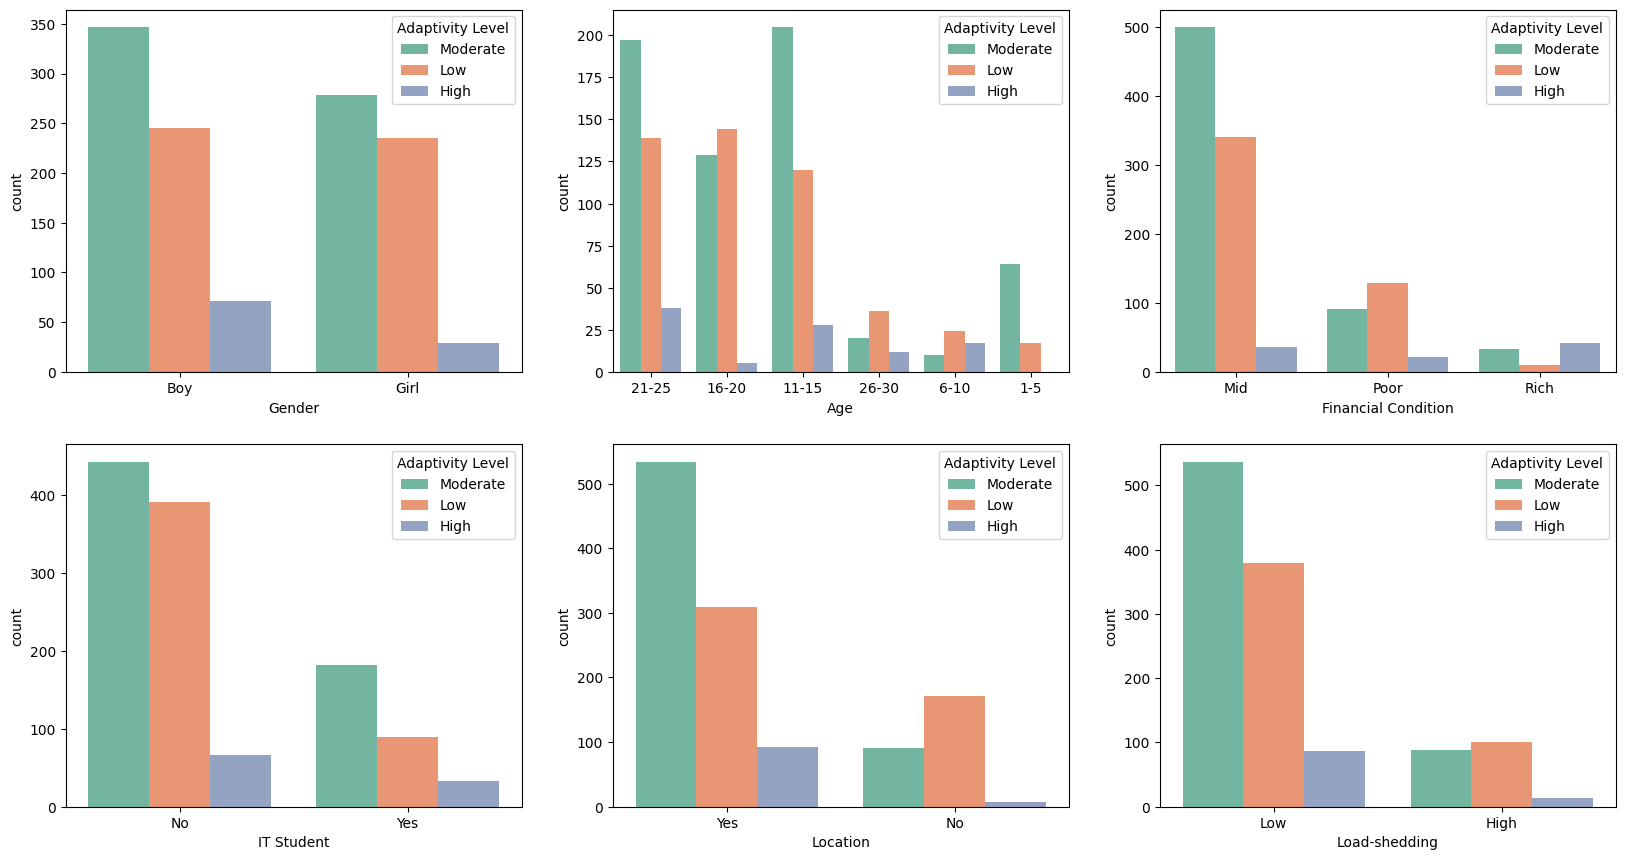

In [13]:
plt.tight_layout()

UserProfile = ['Gender','Age','Financial Condition','IT Student','Location','Load-shedding']
plt.figure(figsize=(20,16))

for i, col in enumerate(UserProfile):
    plt.subplot(3,3,i + 1)
    ax = sns.countplot(data = df, x = col, hue = "Adaptivity Level", palette = sns.color_palette("Set2"))

**Among education level, which category has mostly low adaptivity level?**

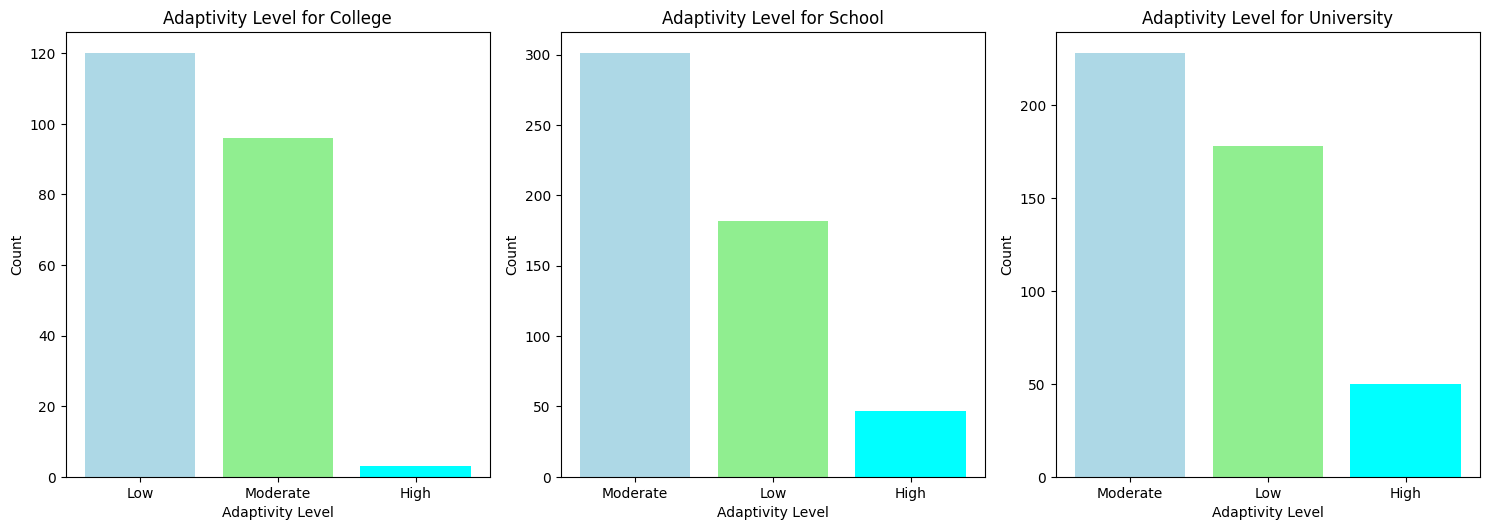

In [14]:
graphs = 1
plt.figure(figsize=(15,10))
c = ['lightblue','lightgreen','cyan']
for i in np.unique(df["Education Level"].values):
    plt.subplot(2,3,graphs)
    un, count = np.unique(df[df["Education Level"] == i]["Adaptivity Level"].values, return_counts=True)
    count, un = zip(*sorted(zip(count, un), reverse=True))
    plt.bar(un, count,color=c)
    plt.title("Adaptivity Level for " + i)
    plt.xlabel("Adaptivity Level")
    plt.ylabel("Count")
    graphs = graphs + 1
plt.tight_layout()

## 2.1 Feature Engineering  

**Apply Label Encoder to change all datatype**

In [15]:
# List of categorical columns
categorical_columns = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student', 'Location', 'Load-shedding',
                       'Financial Condition', 'Internet Type', 'Network Type', 'Class Duration', 'Self Lms', 'Device']

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each specified column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the dataset after label encoding
print(df.head())

encoded_data = df.copy()
for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(encoded_data[col].value_counts(), end="\n\n")

   Gender  Age  Education Level  Institution Type  IT Student  Location  \
0       0    3                2                 1           0         1   
1       1    3                2                 1           0         1   
2       1    2                0                 0           0         1   
3       1    1                1                 1           0         1   
4       1    2                1                 1           0         1   

   Load-shedding  Financial Condition  Internet Type  Network Type  \
0              1                    0              1             2   
1              0                    0              0             2   
2              1                    0              1             2   
3              1                    0              0             2   
4              1                    1              0             1   

   Class Duration  Self Lms  Device Adaptivity Level  
0               2         0       2         Moderate  
1               1 

In [16]:
df['Adaptivity Level'] = df['Adaptivity Level'].map({'Moderate': 2, 'Low': 1, 'High': 0})

In [17]:
X = df.drop(['Adaptivity Level'], axis=1)
y = df['Adaptivity Level']

# 3. Model Training

In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [19]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (964, 13)
X_test shape: (241, 13)
y_train shape: (964, 1)
y_test shape: (241, 1)


**Standardizing the data**

In [20]:
# Standardize the data
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

# 4. Model Selection and Training

## **Defining the classifier for classification**

### **Logistic Regression**

Train Accuracy : 0.6929460580912863
Train Confusion Matrix:
[[ 35  17  25]
 [  4 217 156]
 [ 11  83 416]]


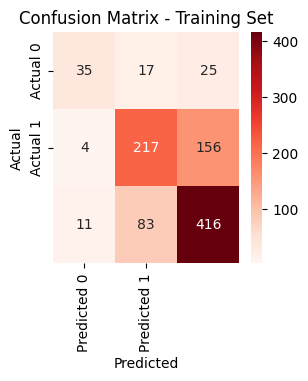

--------------------------------------------------
Test Accuracy : 0.6887966804979253
Test Confusion Matrix:
[[11  5  7]
 [ 1 57 45]
 [ 3 14 98]]


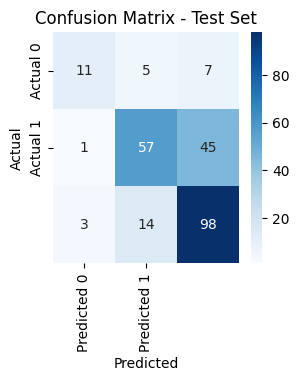

              precision    recall  f1-score   support

           0       0.73      0.48      0.58        23
           1       0.75      0.55      0.64       103
           2       0.65      0.85      0.74       115

    accuracy                           0.69       241
   macro avg       0.71      0.63      0.65       241
weighted avg       0.70      0.69      0.68       241



In [21]:
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred)

#check accuracy of training and testing
print("Train Accuracy :", accuracy_score(y_train, log_reg.predict(X_train)))
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, log_reg.predict(X_train)))

#plot confusion matrix for training set
plt.figure(figsize=(3, 3))
cm_train = confusion_matrix(y_train, log_reg.predict(X_train))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

print("-"*50)

print("Test Accuracy :", accuracy_score(y_test, log_reg.predict(X_test)))
print("Test Confusion Matrix:")
print(confusion_matrix(y_test,log_reg.predict(X_test)))

# Plot the Confusion Matrix for Test Set
plt.figure(figsize=(3, 3))
cm_test = confusion_matrix(y_test, log_reg.predict(X_test))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()


# Print classification report
print(classification_report(y_test, y_pred))

### **Decision Tree Classifier**

Train Accuracy : 0.9346473029045643
Train Confusion Matrix:
[[ 62   0  15]
 [  3 359  15]
 [  3  27 480]]


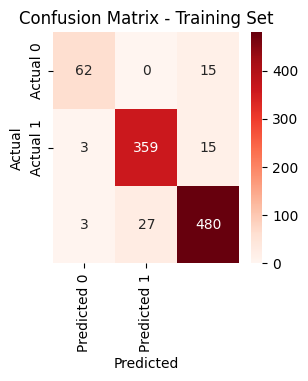

--------------------------------------------------
Test Accuracy : 0.9004149377593361
Test Confusion Matrix:
[[ 15   0   8]
 [  2  95   6]
 [  0   8 107]]


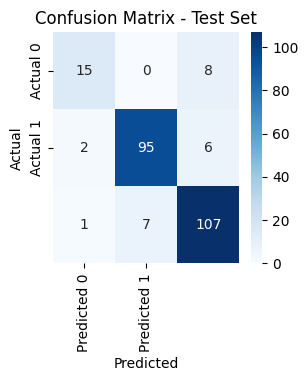

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.92      0.92      0.92       103
           2       0.88      0.93      0.91       115

    accuracy                           0.90       241
   macro avg       0.90      0.83      0.86       241
weighted avg       0.90      0.90      0.90       241



In [22]:
# Initialize the classifier
dt = DecisionTreeClassifier()

# Fit the classifier
dt.fit(X_train, y_train.ravel())

# Predict
pred = dt.predict(X_test)

# Define the parameters for grid search 
params = {
    'max_depth': range(1, 20, 2),
    'min_samples_leaf': range(1, 100, 5),
    'min_samples_split': range(2, 10),
    'criterion': ["gini", "entropy"],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt']
}


# Perform grid search
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=0, scoring="accuracy", error_score='raise')

grid_search.fit(X_train, y_train.ravel())  

# Get the best estimator
dt_best = grid_search.best_estimator_

accuracy_dt_best = accuracy_score(y_test, pred)

# Function to evaluate the model
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    #plot confusion matrix for training set
    plt.figure(figsize=(3, 3))
    cm_train = confusion_matrix(y_train, dt.predict(X_train))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training Set')
    plt.show()

    print("-" * 50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))
    # Plot the Confusion Matrix for Test Set
    plt.figure(figsize=(3, 3))
    cm_test = confusion_matrix(y_test, dt.predict(X_test))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Set')
    plt.show()

# Evaluate the best model
evaluate_model(dt_best)

# Predict with the best model
pred = dt_best.predict(X_test)

# Print classification report
print(classification_report(y_test, pred, zero_division=1))


### **Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.88      0.65      0.75        23
           1       0.93      0.94      0.94       103
           2       0.90      0.94      0.92       115

    accuracy                           0.91       241
   macro avg       0.91      0.84      0.87       241
weighted avg       0.91      0.91      0.91       241

Training Accuracy (Random Forest): 0.9346


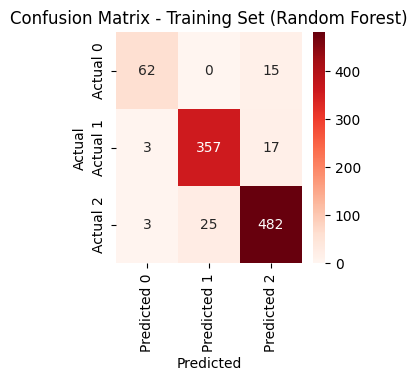

Testing Accuracy (Random Forest): 0.9129


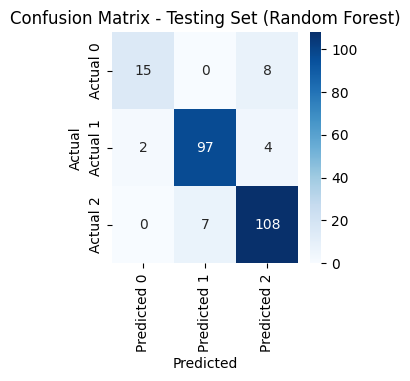

In [23]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Fit the classifier
rf_classifier.fit(X_train_stand, y_train)

# Predict
y_pred_rf = rf_classifier.predict(X_test_stand)

# Print classification report
print(classification_report(y_test, y_pred_rf))


# Calculate training accuracy
accuracy_train_rf = accuracy_score(y_train, rf_classifier.predict(X_train_stand))
print(f"Training Accuracy (Random Forest): {accuracy_train_rf:.4f}")

# Confusion Matrix for Training Set (Random Forest)
cm_train_rf = confusion_matrix(y_train, rf_classifier.predict(X_train_stand))
plt.figure(figsize=(3, 3))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set (Random Forest)')
plt.show()

# Confusion Matrix for Testing Set (Random Forest)
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Testing Accuracy (Random Forest): {accuracy_rf:.4f}")

cm_test_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(3, 3))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set (Random Forest)')
plt.show()

### **Neural Network Model**

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Initialize the model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=X_train_stand.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for adaptivity level

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_stand, y_train, epochs=100, batch_size=32, validation_data=(X_test_stand, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_stand, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


# Print classification report
print(classification_report(y_test, y_pred_rf))




Epoch 1/100


31/31 [==============================] - 2s 12ms/step - loss: 0.9407 - accuracy: 0.6017 - val_loss: 0.8319 - val_accuracy: 0.6722
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.7537 - accuracy: 0.7054 - val_loss: 0.7249 - val_accuracy: 0.6846
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.7158 - val_loss: 0.6830 - val_accuracy: 0.6971
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6273 - accuracy: 0.7168 - val_loss: 0.6397 - val_accuracy: 0.7469
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5880 - accuracy: 0.7500 - val_loss: 0.6093 - val_accuracy: 0.7759
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5584 - accuracy: 0.7707 - val_loss: 0.5909 - val_accuracy: 0.7801
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.5293 - accuracy: 0.7853 - val_loss: 0.5638 - val_accuracy: 0.8091
Epoch 8

### **Comparison accuracy between each model**

**Training and Validation**

In [25]:

# Define the models and their corresponding accuracies
models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Neural Network"
]

accuracies = [
    accuracy_log_reg,  
    accuracy_dt_best,  
    accuracy_rf,   
    accuracy 
]

# Create a DataFrame
comparison_df = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    
})

# Display the DataFrame
print(comparison_df)





                 Model  Accuracy
0  Logistic Regression  0.688797
1        Decision Tree  0.900415
2        Random Forest  0.912863
3       Neural Network  0.887967


# Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Define the model and its hyperparameter grid
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



print(classification_report(y_pred, y_test)) 


Accuracy: 0.9087136929460581
              precision    recall  f1-score   support

           0       0.65      0.88      0.75        17
           1       0.94      0.92      0.93       105
           2       0.93      0.90      0.91       119

    accuracy                           0.91       241
   macro avg       0.84      0.90      0.87       241
weighted avg       0.92      0.91      0.91       241

